# Premiers test PCA

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.decomposition import PCA, randomized_svd

In [7]:
path0 = r'C:\Users\pitip\code\ClaireLeroux44\ArtRecognition'
path_resample_224 = r'raw_data/resample224'
path_resample_40 = r'raw_data/resample40'

In [10]:
img_list = os.listdir(os.path.join(path0, path_resample_40))

In [44]:
n_im = 100

In [59]:
%%time
data = np.zeros((224*224*3, n_im))
for i, path in enumerate(img_list[:n_im]):
    im = plt.imread(os.path.join(path0, path_resample_224, path))
    data[:,i] = im.flatten()
data = data/255

Wall time: 14.9 s


In [65]:
%%time
pca = PCA(n_components=500)
pca.fit(data)

Wall time: 1min 32s


PCA(n_components=500)

In [66]:
pca.explained_variance_ratio_[:10]

array([0.1256728 , 0.09171131, 0.08250612, 0.0364684 , 0.03023337,
       0.02777848, 0.01819733, 0.01425127, 0.0128532 , 0.01230403])

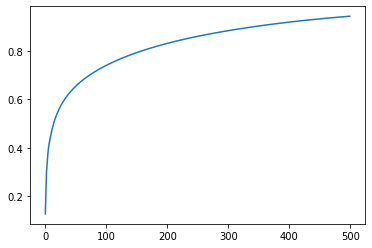

In [67]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [68]:
for i in [10, 20, 50, 75, 100, 150, 200, 250, 300, 400, 500]:
    print(f"{i} components: {100*np.sum(pca.explained_variance_ratio_[:i]):.2f} % explained variance")

10 components: 45.20 % explained variance
20 components: 53.89 % explained variance
50 components: 65.25 % explained variance
75 components: 70.29 % explained variance
100 components: 73.97 % explained variance
150 components: 79.30 % explained variance
200 components: 83.13 % explained variance
250 components: 86.08 % explained variance
300 components: 88.43 % explained variance
400 components: 91.98 % explained variance
500 components: 94.43 % explained variance


In [69]:
data.shape

(150528, 1000)